In [1]:
%matplotlib inline 
exec(open("./stability.py").read()) 

# Eingenvalue stability of the ENSO oscillator equations

Eingenvalue stability analysis is useful, at times more useful than the methods used for stability analysis so far, because we are not restricted to thinking about the problem in the limit $\Delta t \rightarrow 0$, which is something we cannot afford. Instead, we will consider a finite $\Delta t$, which we must choose for our numerical scheme.

The problem you were set with Jin's paper is governed by two coupled ODEs:

$$\frac{dT}{dt} = RT + \gamma h - \epsilon (h+bT)^3 + \gamma\xi \qquad (1)$$
$$\frac{dh}{dt} = -rh - \alpha bT - \alpha\xi \qquad (2)$$ 

To understand the stabiliy of this sytem, we consider first the **analytical solutions** for the (simplest) linear case: the coupling coefficient $\mu$ is a constant between 0-1; no non-linearity ($\epsilon=0$), nor wind forcing ($\xi=0$). With these simplifications the system in (1) can be thought as a general problem in which, for a vector $\pmb{u}$, we have:
$$\frac{d\pmb{u}}{dt} = M\pmb{u} \qquad (3)$$
In our specific case, $\pmb{u}$ has dimension 2 and the tuple $(T,h)$ are its elements, so that:

$$\frac{d}{dt} \begin{bmatrix}
           T \\
           h \\
         \end{bmatrix} = M \begin{bmatrix}
           T \\
           h \\
         \end{bmatrix} \qquad $$

In general, the matrix M will not be diagonal, so that the components of the linearised system above will be coupled. We can, however, make a change of coordinates, to a system  $\pmb{w}=(\hat{T},\hat{h})$ in order to decouple our system of equations. This transformation can be written as:
$$\frac{d\pmb{w}}{dt} = \Lambda\pmb{w} \qquad (4)$$
or:
$$\frac{d}{dt} \begin{bmatrix}
           \hat{T} \\
           \hat{h} \\
         \end{bmatrix} = \Lambda \begin{bmatrix}
           \hat{T} \\
           \hat{h} \\
         \end{bmatrix} \qquad $$


where $\Lambda$ is a diagonal matrix, which means that a) we are dealing with an eigenvector-eigenvalue problem and b) we can now conveniently write the system of (two in our case) decoupled equations in which $w_j$ are the eigenvector elements and $\lambda_j$ are the eigenvalue elements:
$$\frac{dw_j}{dt} = \lambda_j w_j, \quad j=1,2 \qquad (5)$$

We know that each one of the ODEs above has an exact analytical solution of the form: $w_j(t)=w_j(0)e^{\lambda_j t}e^{i\omega_j t}$. The **real exponent** $\lambda_j t$ governs the growth/decay of the solution in time. The **imaginary exponent** $i\omega_j t$ governs the phase response, but it plays no part in the change of amplitude  of the solution, as its modulus is bound by 1. 

We will focus, therefore, on the scalar $\lambda t=\Re{(\lambda_j t + i\omega_j t)}$, because it informs whether or not the solutions will grow, decay, or remain neutral in time. 

## Considerations on numerical stability ##

Once discretised in time, our system will progress from $w^n$ to $w^{n+1}$. We can define an amplification factor $A$ that defines A-stability:
$$ A = \frac {w^{n+1}}{w^{n}}$$

For the **numerical stability** of our system of discretised ODEs,
$$ |A| \le 1+ \eta \Delta t$$

so that the system will converge to the true solution for $\Delta t \rightarrow 0$. For the previous problem, $\eta=\lambda_j$ and at each time increment the change in amplitude will be $1+\lambda_j \Delta t$. Obviously, for the solution to neither grow nor decay in time, $\lambda$ should be ..... ?

Ideally, each of the scaled eigenvalues for our *numerically discretised problem*, $\lambda_j \Delta t$, should fall within the stability boundary of the proposed problem. 

What is attractive about this framework is that, if we can establish the stability of the transformed system of ODEs, this will also guarantee the stability of our original system of ODEs. Also, if we solve for each $w_j$, we can then reconstruct the solution to our original problem.

Each equation in the set (5) above can then be thought of, individually, as the extremely simple equation below:
$$\frac{dv}{dt}=\lambda v \quad (6)$$

If we apply an Euler (forward) time scheme to (6), for instance:
$$v^{n+1}=v^n + \lambda \Delta t v^n = (1+\lambda \Delta t) v^n\quad $$
we will assume that the solution has the general form seen above (for eqn. 5), so that, over $n$ time steps:
$$v^n=A^n v^0$$
where $A=(1+\lambda \Delta t)$ is again our **amplification factor** (careful that the symbol $n$ applied to $A$ above means that it is raised to the power of $n$).

*EXERCISE:* 
* QUESTION 1: under what conditions of $|A|$ will $v^n$ grow unbounded in time as $n \rightarrow \infty $?
* QUESTION 2: plot the region (use *cmath* in Python) in the $\Re(\lambda)$ vs $\Im(\lambda)$ plane for which $|A|\le1$, using contours, and analyse the stability regime for the Euler (forward) scheme. Hint: now consider A as a complex number and set $\Im{A}=e^{i\theta}$ so that you will encompass the frequency domain too.
* QUESTION 3: what does this mean for your choice of time step $\Delta t$?
* QUESTION 4: now try for a more sophisticated scheme, like Leapfrog

## Eigenvalue stability of the two ODEs in our ENSO problem ##
Eingevalue-Stability (what Durran calls A-stability) can be predicted analytically by considering the two eigenvalues of the two linearised coupled ODEs (1,2) at the start of this document. They are:

$$\lambda_{1,2} = \frac{R-r \pm \sqrt{(r-R)^2 - 4(\gamma\alpha b - Rr)}}{2} \qquad (7).$$
CAREFUL that here the symbol $\lambda$ is used here in the context of the typical eigenvalue conventions, so that it is a complex number and contains both amplitude and frequency information.
You can plot the eigenvalues as in Jin's paper (they are complex numbers, you must use the *cmath* library in Pyton to manipulate them). You can actually use the numpy function *numpy.linalg.eig(a)* to compute eigenvectors+eigenvalues and the values of the analytical $\lambda$: see the file that I have uploaded, with the name *eigenvalues_2x2.py*.


## Stability dependencies of the analytical model
The region in eigenvalue space for the analytic stability is shown in Figure 1 (using the parameters defined in Project 1, Task A), now exploring the range: $0 \le \mu \le 1$. We must therefore compute the eigenvalue/eigenvector pairs over the entire range of $\mu$, since $\mu$ alters the values of two of the elements of matrix M in equation (3) above. 

Our analysis of Fig. 1 below shows that the analytical model above is neutral for $\mu=2/3$ and stable for $\mu \le 2/3$ (go back to the previous section and see if you can understand why). Next, to decide about the suitability of any time scheme (e.g. the Euler or the RK4) for this problem, you can test, by comparison, whether your time scheme is A-stable for the special situation of $\mu=2/3$ (see Durran's definition of A-stability in Section 2.1, pages 41-42).

*WHAT YOU SHOULD CONSIDER NEXT*: once we know that the analytical model has a neutral state, can we find a numerical scheme that will behave in exactly that way? And what is the dependence on the choice of time step $\Delta t$?

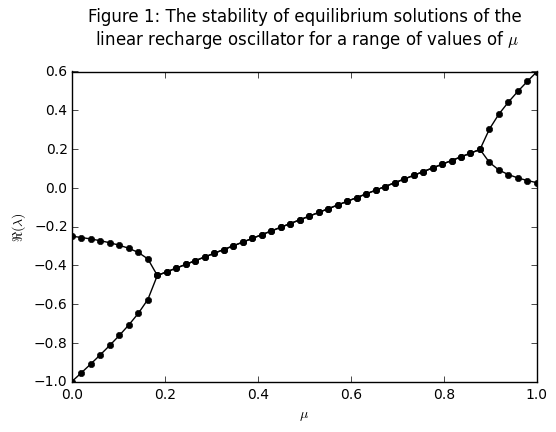

In [2]:
analytic_stability()
pl.title('Figure 1: The stability of equilibrium solutions of the \n linear recharge oscillator for a range of values of $\mu$', fontsize=12, y=1.06)
pl.show()

## Numerical considerations on stability. ##
Next, having established under what conditions our analytical system is A-stable in time, we want to to decide about the suitability of any discrete time scheme (e.g. the Euler or the RK4) for this problem. Again refer to Durran's concept of A-stability (see Durran's definition in Section 2.1, pages 41-42).

Many of you will choose to solve the problem numerically using the 4-stage, 4th order Runge-Kutta method (RK4) in time, which is defined for an arbitrary first order ODE, $dq/dt=f(q(t),t)$, as:

$$ q^{n+1} = q^{n} + \frac{\Delta t}{6} (k_{1} + 2k_{2} + 2k_{3} + k_{4})  $$
$$ k_{1} = f(q^{n}, n\Delta t), \quad k_{2} = f \left(q^{n} + \frac{k_{1}\Delta t}{2}, \left(n + \frac{1}{2} \right)\Delta t \right),$$
$$ k_{3} = f \left(q^{n} + \frac{k_{2}\Delta t}{2}, \left(n + \frac{1}{2} \right)\Delta t \right), \quad k_{4} = f(q^{n} + k_{3}\Delta t, (n + 1)\Delta t ),$$

To find the **numerical stability** of our problem, under RK4, the transformed ODEs are first written in terms of eigenvalues and eigenvectors as we did in the first section (eqn. 5) so that:

$$\frac{d\hat{T}}{dt} = \lambda_{1} \hat{T}, \quad \frac{d\hat{h}}{dt} = \lambda_{2} \hat{h} \qquad (8).$$

Or, more practically:
$$\hat{T}^{n+1} = A_1 \hat{T}^{n}, \quad \hat{h}^{n+1} = A_2 \hat{h}^{n} \qquad (9).$$

where $\nu_j=\lambda_j \Delta t$ are the the scaled eigenvalues and $A_j=(1+\nu_{j})$. Do remember that $A$ will be a complex number if the $\lambda$ returned from the eingevalue/eigenvector calculation is a complex number itself.

Substituting these expressions into the 4-stage iterative Runge-Kutta numerical scheme (RK4) above (eqn. 5) results in a more complicated expression for $A$ (than what we had found for the Euler case):

$$ A(\nu_j)=1+\nu_j+\frac{1}{2}\nu_j^2 + \frac{1}{6}\nu_j^3 + \frac{1}{24}\nu_j^4 \qquad (10);$$ 

$|A|$ is the ***amplification factor*** and hence we require $|A| \leq 1$ for stability of our numerical solution. 



## Assessing the "mimic" and stability properties of your time scheme.
Next, to decide about the suitability of any time scheme (e.g. the Euler or the RK4) for this problem, you can test, by comparison, whether the analytic range of stable $\lambda$ is covered by your time scheme's region of stability. Consider what happens in the different areas of the $\Re(\lambda)/\Im(\lambda)$ diagram by plotting $|A|$ from equation (10) above.

## Stability region for the Runge-Kutta solutions
The region in eigenvalue space for which the RK4 is stable is shown in Figure 3, with the same parameters as above.

QUESTION: How far can you go in increasing the value of $\Delta t$ (saving comptuer time) before the solutions become unstable? 

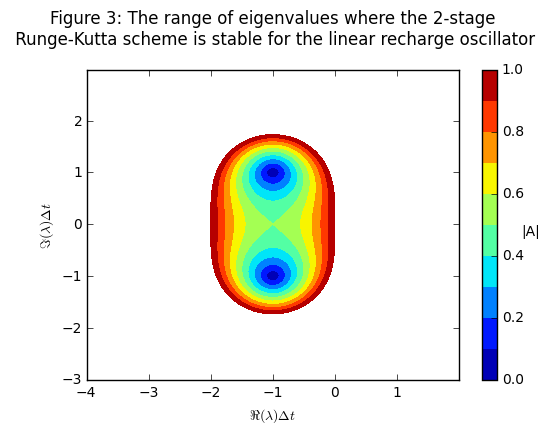

In [3]:
rk2_stability()
pl.title('Figure 3: The range of eigenvalues where the 2-stage \n Runge-Kutta scheme is stable for the linear recharge oscillator', fontsize=12, y=1.06)
pl.show()

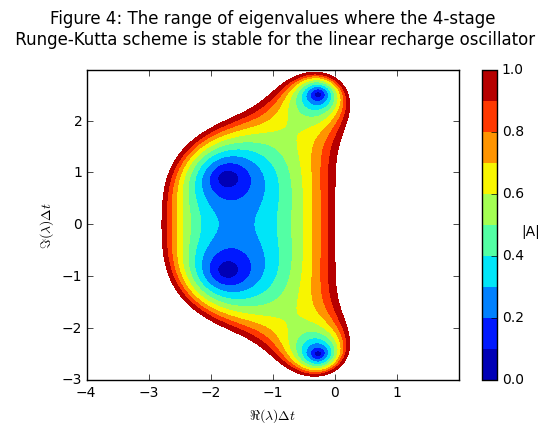

In [4]:
rk4_stability()
pl.title('Figure 4: The range of eigenvalues where the 4-stage \n Runge-Kutta scheme is stable for the linear recharge oscillator', fontsize=12, y=1.06)
pl.show()

EXERCISE:
* implement in Python and try this for each stage of RK from 1 to 4
* implement in Python and try this for more schemes, e.g. Matsuno
* **Interpret!** For instance, explain about the relative limitations in terms of $\Delta t$ and include a consideration of the response in the frequency domain.